This is My first End to End deep learning Project from scratch . so , lets have fun while making this project

First of all lets understand the workflow of the Project : 
!. Image data collection 2. data analysis and EDA 2. Data Preprocessing 3. Splitting of test data and training data 4. Model training 5. Model Evaluation(CNN) 6. Streamlit App &. Docker

seeding

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


importing dependencies

In [2]:
from tensorflow.keras import models,layers,datasets
import matplotlib.pyplot as plt

data collection and analysis

In [3]:
fashion_data = datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_data.load_data()

In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
print(len(train_images))

60000


In [7]:
print(len(train_labels))

60000


In [8]:
print(train_images[0].shape)

(28, 28)


In [9]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

Image visualization

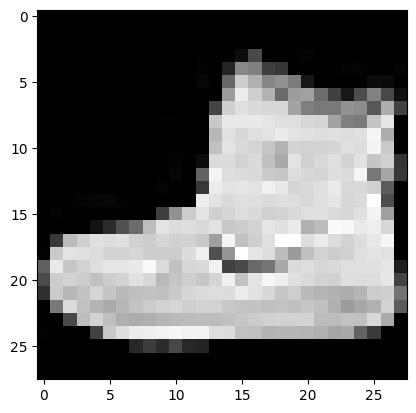

In [10]:
plt.imshow(train_images[0],cmap='grey')
plt.show()

In [11]:
print(train_labels[0])

9


normalize

In [12]:
train_images , test_images = train_images/255.0 , test_images/255.0

In [13]:
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

Convolutional Neural Network

In [14]:
#build the Convutional base 
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape =(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu', input_shape =(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu', input_shape =(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

#adding the dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

c:\Users\shubh\Fashion M\tf-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

Model Training

In [17]:
history = model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7079 - loss: 0.8178 - val_accuracy: 0.8325 - val_loss: 0.4591
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8455 - loss: 0.4243 - val_accuracy: 0.8605 - val_loss: 0.3907
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8685 - loss: 0.3589 - val_accuracy: 0.8696 - val_loss: 0.3626
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8836 - loss: 0.3173 - val_accuracy: 0.8742 - val_loss: 0.3515
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8942 - loss: 0.2877 - val_accuracy: 0.8835 - val_loss: 0.3367


Model Evaluation

In [18]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest Accuracy',test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.8835 - loss: 0.3367

Test Accuracy 0.8834999799728394


EDA of the Model 

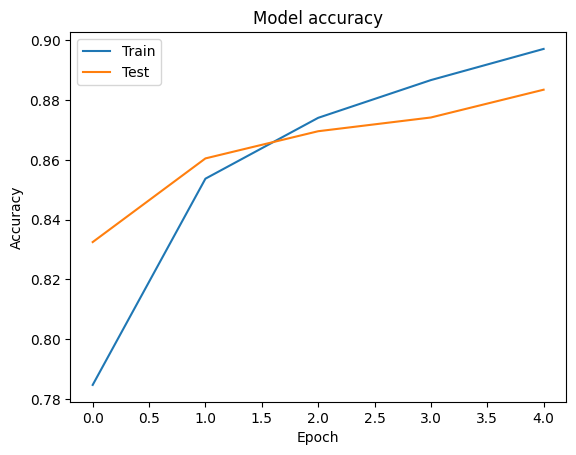

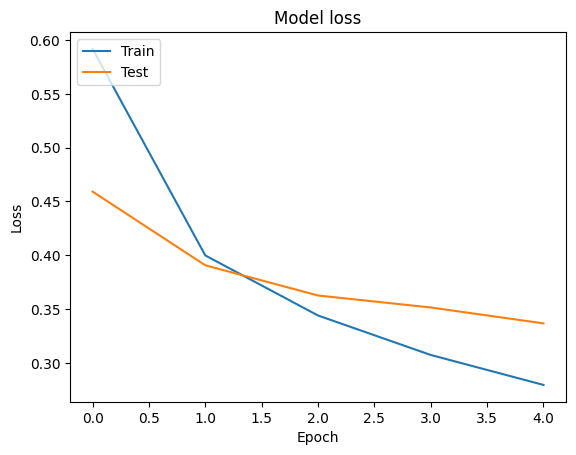

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model saving

In [21]:
model.save('trained_fashion_mnist_model.keras')